<a href="https://colab.research.google.com/github/RudkovYaroslav/project_2/blob/main/project_bykes_GoFast_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Исследование данных о пользователях сервиса аренды самокатов GoFast**

Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

Без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;

С подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

**Цель исследования:**
- Проанализировать данные с целью проверки гипотез
- Сформулировать выводы на основе гипотез, которые помогут бизнесу вырасти

**Ход исследования**

Я получу данные из трех DataFrame, каждый из кторых находится в csv файле. О качестве этих DataFrame пока ничего не известно, так что, скорее всего, понадобится провести предобработку.

Проверю данные на аномалии и выбросы, которые могут повлиять на исследование, заполню пропуски, если они имеются, и в целом поищу возможность исправить все ошибки, которые не приведут к искажению конечного результата.

Итоговое исследование пройдет в 7 этапов:
- 1. Обзор данных
- 2. Предобработка данных
- 3. Проведение исследовательского анализа с цеью более глубокой оценки важных параметров
- 4. Агрегирование данных
- 5. Подсчет общей выручки
- 6. Проверка гипотез
- 7. Общий вывод по исследованию

**Импорт требуемых библиотек**

In [ ]:
import pandas as pd #Библиотека для работы с DataFrame
import datetime as dt #Библиотека для обаботки дат
import matplotlib.pyplot as plt #Библиотека для постройки графиков
import numpy as np #Библиотека для более глубоких математических вычислений
from scipy import stats as st # Библиотека для более простого построения распределений
import warnings
warnings.filterwarnings('ignore') #Библиотека для игнорирования красных знаков ошибок

In [ ]:
plt.rcParams["figure.figsize"] = (15,5) #Задаем размер выводимых в дальнейшем графиков

## Шаг 1. Загрузка данных

### Считывание csv файлов

In [ ]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
sub = pd.read_csv('/datasets/subscriptions_go.csv')

### Изучение общей информации о данных

In [ ]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [ ]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [ ]:
sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Вывод по шагу 1

Ознакомились с тремя изначальными DataFrame. Осмотрели их на способность описать нужную нам информацию для анализа, а также "на глаз" оценили репрезентативность.

## Шаг 2. Предобработка данных

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [ ]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


После первого, более подробного взгляда видим, что в DataFrame с количеством пользователей есть 1565 строк, столбцы имеют правильный тип данных. Что нельзя сказать о DataFrame с информацией о поездках. Там целых 18068 строк, а столбец date имеет неправильный тип данных.

### Приведение к правильным форматам

Видим, что дата не дата

In [ ]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Поиск пропусков в значениях

In [ ]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [ ]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

### Создание дополнительного столбца

Перед созданием столбца с месяцем, проверим, точно ли информация собрана за 1 год

In [ ]:
rides['date'].max()-rides['date'].min()

Timedelta('363 days 00:00:00')

Получяется у нас данные примерно за один год, все в порядке

In [ ]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Проверка на явные и неявные дубликаты

In [ ]:
users.duplicated().sum()

31

In [ ]:
users = users.drop_duplicates()

In [ ]:
rides.duplicated().sum()

0

In [ ]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [ ]:
sorted(users['name'].unique())

['Агата',
 'Аделина',
 'Адель',
 'Айдар',
 'Александр',
 'Александра',
 'Алексей',
 'Алина',
 'Алиса',
 'Алия',
 'Алла',
 'Альберт',
 'Альбина',
 'Алёна',
 'Амалия',
 'Амина',
 'Амир',
 'Анастасия',
 'Анатолий',
 'Ангелина',
 'Андрей',
 'Анжелика',
 'Анна',
 'Антон',
 'Антонина',
 'Ариана',
 'Арина',
 'Арсен',
 'Арсений',
 'Артемий',
 'Артур',
 'Артём',
 'Богдан',
 'Борис',
 'Вадим',
 'Валентина',
 'Валерий',
 'Валерия',
 'Варвара',
 'Василий',
 'Василина',
 'Василиса',
 'Вера',
 'Вероника',
 'Виктор',
 'Виктория',
 'Виолетта',
 'Виталий',
 'Виталина',
 'Влад',
 'Влада',
 'Владимир',
 'Владислав',
 'Владислава',
 'Всеволод',
 'Вячеслав',
 'Галина',
 'Георгий',
 'Герман',
 'Глеб',
 'Гордей',
 'Григорий',
 'Давид',
 'Дамир',
 'Даниил',
 'Данил',
 'Данила',
 'Даниэль',
 'Дарина',
 'Дарья',
 'Демид',
 'Денис',
 'Диана',
 'Дмитрий',
 'Ева',
 'Евгений',
 'Евгения',
 'Егор',
 'Екатерина',
 'Елена',
 'Елизавета',
 'Елисей',
 'Есения',
 'Жанна',
 'Зарина',
 'Захар',
 'Злата',
 'Иван',
 'Игнат',

Кроме как объединить Даниила, Данилу и Данила, а также Софью и Софию

### Округление данных и ликвидация аномальных значений

In [ ]:
rides['distance'] = np.ceil(rides['distance'])
rides

,user_id,distance,duration,date,month
0,1,4410.0,25.599769,2021-01-01,1
1,1,2618.0,15.816871,2021-01-18,1
2,1,755.0,6.232113,2021-04-20,4
3,1,2695.0,18.511000,2021-08-11,8
4,1,4029.0,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3782.0,19.822962,2021-11-04,11
18064,1534,2841.0,21.409799,2021-11-16,11
18065,1534,3827.0,18.435051,2021-11-18,11
18066,1534,2903.0,16.674362,2021-11-27,11


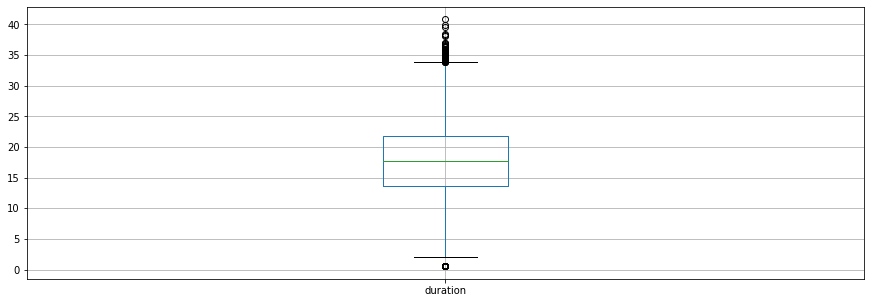

In [ ]:
rides.boxplot(column='duration')
pass

Оставим верхние значения, так как они, все же, имеют место быть, а вот на значения меньше отметки в 2 минуты, взглянем подробнее

In [ ]:
rides[(rides['duration'] <2) & (rides['distance'] <1000)]

,user_id,distance,duration,date,month


Здесь наглядно видно, что все строки, где длительность поездки меньше 2 минут, имеют расстояние больше 1000 метров, что не может быть правдой. Средняя скорость самоката = 15000 метров в час = 500 метров за 2 минуты. Поэтому предлагаю откинуть эти значения, так как они аномальные. Также со стороны выручки это будет незначительная потеря, так как мы оцениваем время в пути, а отбрасывам значения меньше двух минут, соответственно теряем мало.

In [ ]:
rides = rides[(rides['duration'] >= 2)]

### Вывод по шагу 2

Провели предобработку данных для DataFrame:

- Удалили явные/неявные дубликаты
- Избавились от аномалий в значениях длительности поездки. Убрали все поездки, занимающие меньше 2 минут и проехавшие расстояние, куда превышающее среднюю скорость самоката. На итоговую сумму выручки такие данные не сильно повлияют.
- Разобрались с правильным типом данных для каждого столбца
- Проверили наличие пропусков. В трех исходных DataFrame они не были выявлены

## Шаг 3. Исследовательский анализ данных

### Описание и визуализация информации о пользователях и поездках

#### Частота встречаемости городов

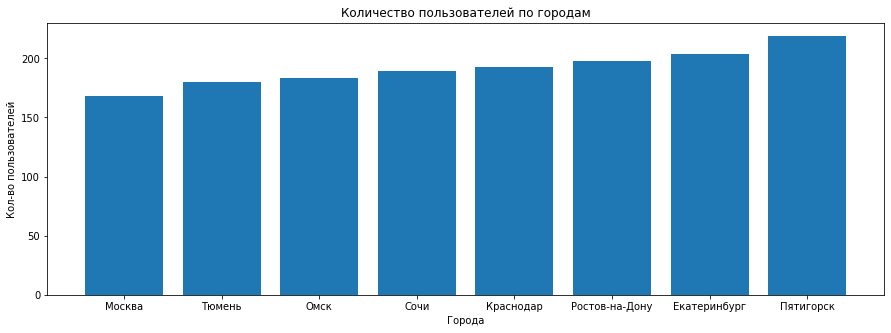

In [ ]:
counts = users.groupby('city')['user_id'].count().sort_values()
plt.bar(counts.index, counts.values)
plt.title('Количество пользователей по городам')
plt.xlabel('Города')
plt.ylabel('Кол-во пользователей')
plt.show()

Также приведем отдельно в виде цифр:

In [ ]:
counts

city
Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: user_id, dtype: int64

#### Соотношение пользователей с подпиской и без подписки;

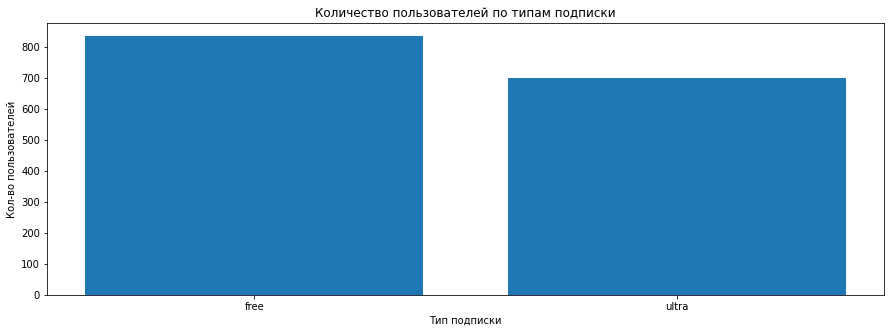

In [ ]:
counts = users.groupby('subscription_type')['user_id'].count()
plt.bar(counts.index, counts.values)
plt.title('Количество пользователей по типам подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Кол-во пользователей')
plt.show()

Также изобразим разницу в количестве более наглядно

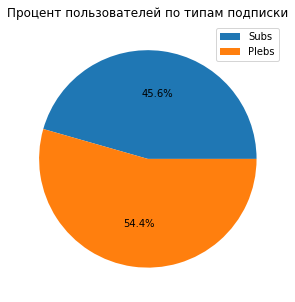

In [ ]:
pie = [counts.values[1] / (counts.values[1] + counts.values[0]), counts.values[0] / (counts.values[1] + counts.values[0])]
fig1, ax1 = plt.subplots()
ax1.pie(pie, autopct='%1.1f%%')
plt.legend(['Subs', 'Plebs'])
plt.title('Процент пользователей по типам подписки')
plt.show()

#### Возраст пользователей

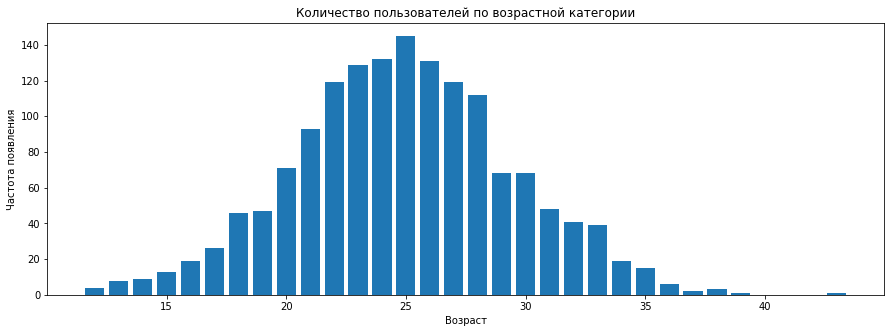

In [ ]:
counts = users.groupby('age')['user_id'].count()
plt.bar(counts.index, counts.values)
plt.title('Количество пользователей по возрастной категории')
plt.xlabel('Возраст')
plt.ylabel('Частота появления')
plt.show()

#### Расстояние, которое пользователь преодолел за одну поездку

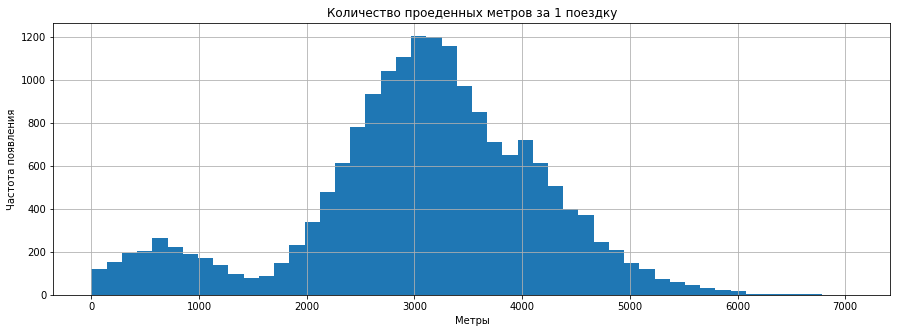

In [ ]:
pd.Series(rides['distance']).plot(kind='hist', bins=50, grid=True, title='Количество проеденных метров за 1 поездку')
plt.xlabel('Метры')
plt.ylabel('Частота появления')
plt.show()

#### Продолжительность поездок

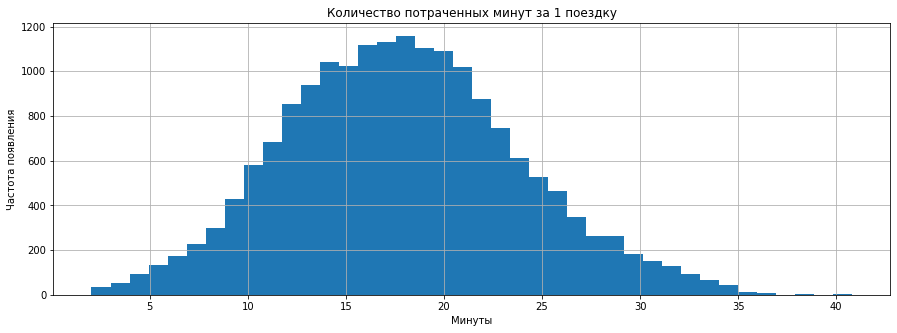

In [ ]:
pd.Series(rides['duration']).plot(kind='hist', bins=40, grid=True, title='Количество потраченных минут за 1 поездку')
plt.xlabel('Минуты')
plt.ylabel('Частота появления')
plt.show()

### Вывод по шагу 3

Вывели и проанализировали основную иформацию о клиентах:

- Москва оказалась самым непопулярным городом, в то время как Пятигорск - самым популярным
- Количество подписок находится примерно на равном уровне. Разница в 9% (Доля с подпиской 45%, без - 54%)
- Возраст пользователей распределен равномерно, самокаты чаще используют люди среднего возраста(целевая аудитория)
- Количество проеденных метров также распределено равномерно, кроме увеличения вначале. В дальнейшем вы рассмотрим его ближе(Оно вызвано тем, что пользователи без подписки часто берут самокат, чтобы быстро куда-то доехать)
- Количество потраченных минут тоже распределено равномерно, больше и сказать нечего

## Шаг 4. Объединение данных

In [ ]:
sub_df = pd.merge(left=users, right=rides, on='user_id')

In [ ]:
df = pd.merge(left=sub_df, right=sub, how='left', on='subscription_type')

Объединили данные в один единый DataFrame

In [ ]:
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755.0,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3782.0,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2841.0,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3827.0,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2903.0,16.674362,2021-11-27,11,8,50,0


In [ ]:
rides

,user_id,distance,duration,date,month
0,1,4410.0,25.599769,2021-01-01,1
1,1,2618.0,15.816871,2021-01-18,1
2,1,755.0,6.232113,2021-04-20,4
3,1,2695.0,18.511000,2021-08-11,8
4,1,4029.0,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3782.0,19.822962,2021-11-04,11
18064,1534,2841.0,21.409799,2021-11-16,11
18065,1534,3827.0,18.435051,2021-11-18,11
18066,1534,2903.0,16.674362,2021-11-27,11


Количество записей ровно как в одно из исходных DataFrame

In [ ]:
df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Новых пропусков не появилось

In [ ]:
plebs = df[df['subscription_type'] == 'free']
plebs

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2516.0,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,847.0,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4005.0,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1206.0,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3048.0,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3782.0,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2841.0,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3827.0,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2903.0,16.674362,2021-11-27,11,8,50,0


In [ ]:
subs = df[df['subscription_type'] == 'ultra']
subs

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755.0,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3974.0,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3289.0,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3077.0,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4708.0,15.839579,2021-10-17,10,6,0,199


### Визуализация общей информации о пользователях с подпиской и без

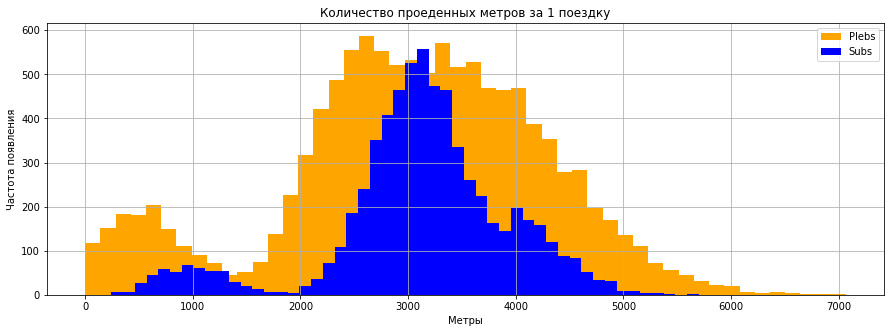

In [ ]:
pd.Series(plebs['distance']).plot(kind='hist', bins=50, grid=True, color='orange')
pd.Series(subs['distance']).plot(kind='hist', bins=50, grid=True, title='Количество проеденных метров за 1 поездку', color='blue')
plt.legend(['Plebs', 'Subs'])
plt.xlabel('Метры')
plt.ylabel('Частота появления')
plt.show()

Приблизим два графика в районе 200-2000

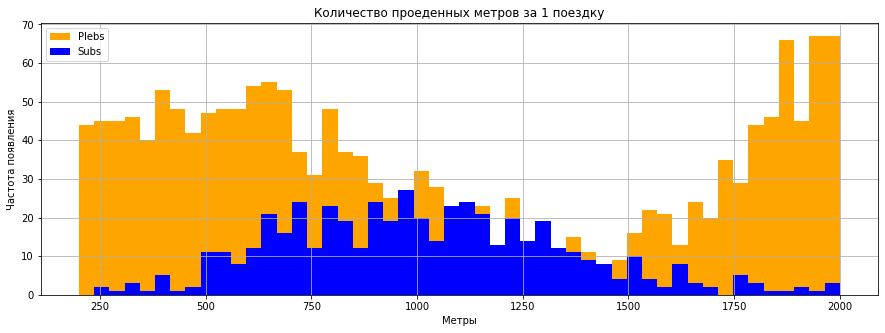

In [ ]:
pd.Series(plebs['distance']).plot(kind='hist', bins=50, grid=True, range=(200,2000), color='orange')
pd.Series(subs['distance']).plot(kind='hist', bins=50, grid=True, title='Количество проеденных метров за 1 поездку',range=(200,2000), color='blue')
plt.legend(['Plebs', 'Subs'])
plt.xlabel('Метры')
plt.ylabel('Частота появления')
plt.show()

Отчетливо видно, что пользователи без подписки чаще используют самокат для быстрых перемещений(Скорее всего один раз)

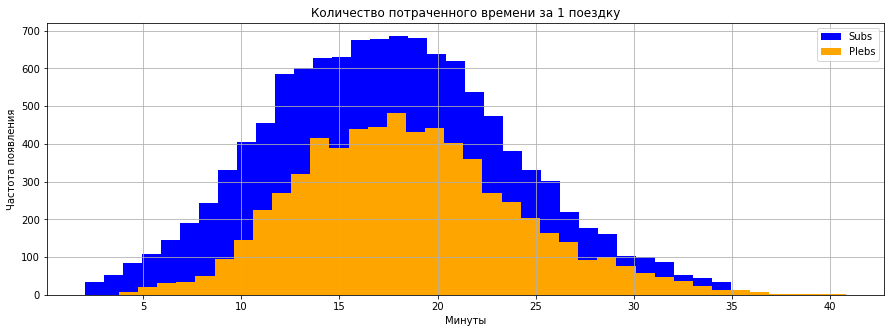

In [ ]:
pd.Series(plebs['duration']).plot(kind='hist', bins=34, grid=True, color='blue')
pd.Series(subs['duration']).plot(kind='hist', bins=38, grid=True, title='Количество потраченного времени за 1 поездку', color='orange')
plt.legend(['Subs', 'Plebs'])
plt.xlabel('Минуты')
plt.ylabel('Частота появления')
plt.show()

### Вывод по шагу 4

Создали единый DataFrame из трех изначальных, добавили там столбец с прибылью за каждую поездку, а затем разделили надве страты(выборки с условием): клиенты с подпиской и без. Проанализировали базовые данные о каждой группе.

- Клиенты без подписки, проезжают более разнообразные расстояния, когда как клиенты имеющие подписку зачастую проезжают в районе 2000-4000 м.

- Клиенты без подписки тратят куда меньше времени на поездки, так как, логично предположить, у них каждая минута на счету.

## Шаг 5. Подсчёт выручки

### Создание сводной таблицы с информацией о каждом месяце для каждого клиента

In [ ]:
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755.0,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3782.0,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2841.0,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3827.0,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2903.0,16.674362,2021-11-27,11,8,50,0


In [ ]:
clean_df = df.groupby(['user_id', 'month']).agg(count = ('date', 'count'),
                                     distance = ('distance', 'sum'),
                                     time = ('duration', lambda x: np.ceil(x).sum()),
                                     minute_price = ('minute_price', 'first'),
                                     start_price = ('start_ride_price', 'first')
                                    )

In [ ]:
clean_df

count  distance  time  minute_price  start_price
user_id month                                                  
1       1          2    7028.0  42.0             6            0
        4          1     755.0   7.0             6            0
        8          2    6724.0  46.0             6            0
        10         2    5811.0  32.0             6            0
        11         3    7005.0  56.0             6            0
...              ...       ...   ...           ...          ...
1534    6          2    3411.0  26.0             8           50
        8          2    7623.0  48.0             8           50
        9          1    4929.0  23.0             8           50
        11         4   13353.0  78.0             8           50
        12         1    2372.0  16.0             8           50

[11300 rows x 5 columns]

In [ ]:
clean_df['subscription_fee'] = 0
clean_df.loc[clean_df['start_price'] == 0, 'subscription_fee'] = 199

In [ ]:
clean_df

count  distance  time  minute_price  start_price  \
user_id month                                                     
1       1          2    7028.0  42.0             6            0   
        4          1     755.0   7.0             6            0   
        8          2    6724.0  46.0             6            0   
        10         2    5811.0  32.0             6            0   
        11         3    7005.0  56.0             6            0   
...              ...       ...   ...           ...          ...   
1534    6          2    3411.0  26.0             8           50   
        8          2    7623.0  48.0             8           50   
        9          1    4929.0  23.0             8           50   
        11         4   13353.0  78.0             8           50   
        12         1    2372.0  16.0             8           50   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
...                         ...  
1534    6                     0  
        8                     0  
        9                     0  
        11                    0  
        12                    0  

[11300 rows x 6 columns]

In [ ]:
clean_df['payment'] = clean_df['time'] * clean_df['minute_price'] + clean_df['subscription_fee'] + clean_df['count'] *  clean_df['start_price']

Время в пути * стоимость минуты + стоимость подписки + количество заездов * стоимость старта

In [ ]:
clean_df

count  distance  time  minute_price  start_price  \
user_id month                                                     
1       1          2    7028.0  42.0             6            0   
        4          1     755.0   7.0             6            0   
        8          2    6724.0  46.0             6            0   
        10         2    5811.0  32.0             6            0   
        11         3    7005.0  56.0             6            0   
...              ...       ...   ...           ...          ...   
1534    6          2    3411.0  26.0             8           50   
        8          2    7623.0  48.0             8           50   
        9          1    4929.0  23.0             8           50   
        11         4   13353.0  78.0             8           50   
        12         1    2372.0  16.0             8           50   

               subscription_fee  payment  
user_id month                             
1       1                   199    451.0  
        4                   199    241.0  
        8                   199    475.0  
        10                  199    391.0  
        11                  199    535.0  
...                         ...      ...  
1534    6                     0    308.0  
        8                     0    484.0  
        9                     0    234.0  
        11                    0    824.0  
        12                    0    178.0  

[11300 rows x 7 columns]

### Вывод по шагу 5

Создали сводную агрегированную таблицу, где можно в более простой форме посчитать общую выручку по каждому клиенту или по каждому месяцу. Также она в дальнейшем пригодится для расчетов прибыли по стратам.

## Шаг 6. Проверка гипотез

Для всего шага 6 при проверке гипотез мы будем использовать **стратифицированные** выборки(то есть сравнивать страты) - выборки по определенному параметру: наличию/отсутсвтвию подписки.

### Гипотеза №1

Проверим, насколько различается продолжительность поездок у двух разных групп

$H_{0}$ = Средние значения генеральной совокупности двух страт равны

$H_{1}$ = Клиенты с подпиской тратят больше времени на поездки, чем клиенты без нее

In [ ]:
plebs_value = plebs['duration']
subs_value = subs['duration']
result = st.ttest_ind(subs_value, plebs_value, alternative='greater')
result.pvalue

4.704468074453899e-28

Получившееся pvalue куда меньше выбранной alpha(статистической значимости) = 0.05, значит есть основания отвергнуть нулевую гипотезу о равенстве средних значений генеральных совокупностей двух выборок. Мы можем с определеннной долей вероятности допустить, что верна альтернативная гипотеза.

### Гипотеза №2

Проверим, успевают ли пользователи с подпиской проехать 3130 метров за один заезд, или они проезжают меньше

$H_{0}$ = Среднее значение расстояния поездки у страты равно 3130 м

$H_{1}$ = Среднее значение расстояния поездки у страты больше 3130 м(Выходит за пределы оптимального износа)

In [ ]:
subs_value = subs['distance']
alpha = .05
value = 3130
result = st.ttest_1samp(subs_value, value, alternative='greater')

if result.pvalue < alpha:
    print('Опровергаем нулевую гипотезу, с большой вероятностью среднее расстояние для одной поездки пользователей с подпиской больше 3130')
else:
    print('Не можем опровергнуть нулевую гипотезу, с большой вероятностью среднее расстояние для одной поездки пользователей с подпиской близко к 3130')
result.pvalue

Не можем опровергнуть нулевую гипотезу, с большой вероятностью среднее расстояние для одной поездки пользователей с подпиской близко к 3130


0.9120422337080507

### Гипотеза №3

$H_{0}$ = Средние значения выручки по месяцам от пользователей без подписки и с ней равны.

$H_{1}$ = Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [ ]:
plebs_value = clean_df[clean_df['subscription_fee'] == 0]['payment']
subs_value = clean_df[clean_df['subscription_fee'] == 199]['payment']

result = st.ttest_ind(subs_value, plebs_value, alternative='greater')
result.pvalue

2.0314113674863288e-30

Опровергаем нулевую гипотезу, так как значение pvalue куда меньше выбранной alpha(статистической значимости) = 0.05. С большой вероятностью помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

### Гипотеза №4

$H_{0}$ = Средние значения двух выборок равны

$H_{1}$ = Среднее значение до изменений больше, чем среднее значение после изменений

Для проверки такой гипотезы использовали бы
```python
st.ttest_rel("Аргумент обязательно до изменений", "Аргумент обязательно после изменений", alternative="greater")
```
Затем сравнили бы pvalue данного теста с alpha = 0.05 и построили бы на фоне результата вывод.

Если pvalue > alpha, то не можем опровергнуть нулевую гипотезу, если наоборот, то опровергаем.

### Вывод по шагу 6

Проверили гипотезы, которые нас интересовали больше всего. Получили, в основном, ожидаемые результаты(подробнее в общем выводе). Если коротко, мы можем с определенной долей вероятностью ответить, что:

- Клиенты без подписки в среднем тратят больше времени в поездках
- Клиенты с подпиской в среднем проезжают расстояние, близкое к 3130 метров за заезд
- Клиенты с подпиской в среднем тратят больше денег, чем клиенты без нее

## Шаг 7. Распределения

### Распределение для промокодов

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум
100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Изходя из условия, нам скорее всего понадобится биноминальное распределение.

In [ ]:
from scipy.stats import binom

Немного упростим себе задачу, чтобы не писать формулу биноминального распределения вручную

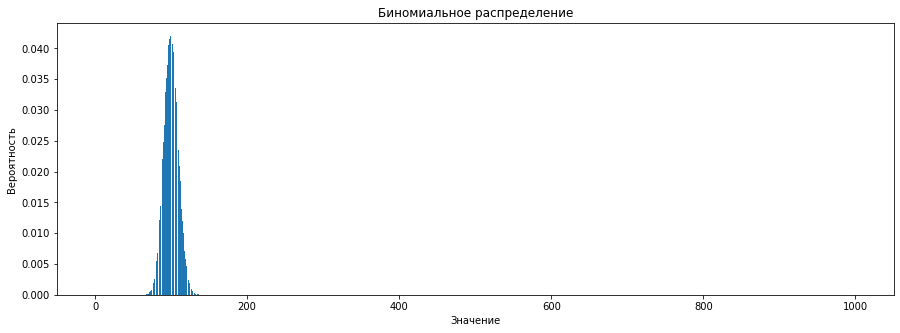

In [ ]:
n = 1000
p = 0.1

probabilities = st.binom.pmf(k=range(n+1), n=n, p=p)

plt.bar(range(n+1), probabilities)
plt.title("Биномиальное распределение")
plt.xlabel("Значение")
plt.ylabel("Вероятность")
plt.show()

Получилось очень отдаленно, большинстов значений в районе 60:150

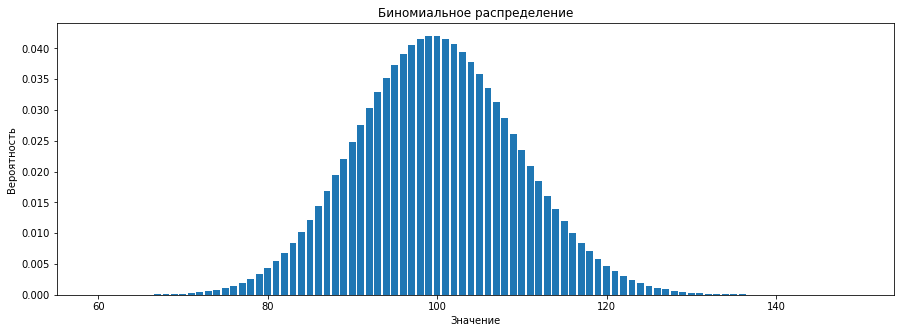

In [ ]:
plt.bar(range(60,150), probabilities[60:150])
plt.title("Биномиальное распределение")
plt.xlabel("Значение")
plt.ylabel("Вероятность")
plt.xlim = (0, 200)
plt.show()

Ответим на вопрос с помощью цикла. Будем использовать метод cdf, который возвращает вероятность того, что случайная переменная примет значение ниже того, которого мы укажем. В нашем случае это значение будет 99, так как нам нельзя попасть ниже(не выплнить план). Начнем с n=1000 и будем прибавлять 1, пока вероятность не окажется меньше 5%

In [ ]:
i=1000
while i < 1200 and binom.cdf(99,i,0.1) > 0.05:
    i += 1
i

1161

Получили достаточно реальный ответ

**Ответ - 1161 промокод.**

### Распределение для уведомлений

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Сразу выделим интересующий нас фрагмент, так как на постройку графика из миллиона элементов уйдет много времени

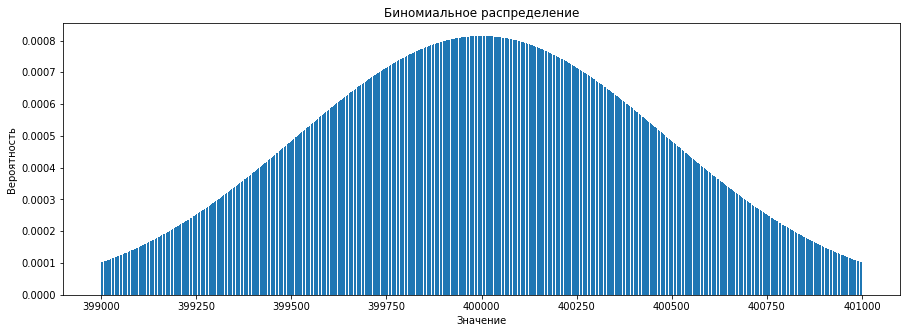

In [ ]:
n = 1000000
p = 0.4

probabilities = st.binom.pmf(k=range(n+1), n=n, p=p)

plt.bar(range(399000,401000), probabilities[399000:401000])
plt.title("Биномиальное распределение")
plt.xlabel("Значение")
plt.ylabel("Вероятность")
plt.show()

In [ ]:
binom.cdf(399500, 1000000, 0.4)

0.1539584359564276

Получили цифру в ~15%, что, на первый взгляд, может показаться странным.

**Объяснение полученного результата**

Немного о статистике - математическое ожидание для данного графика будет равно n * p = 400000, что лишь на 500 больше, чем интересующая нас цифра, но результат вместо ожидаемого процента, близкого к 50%, равен лишь 15. Дело в том, что при увеличении количества экспериментов Бернули в графике биноминального распределения, повышается "острота" графика. Другими словами скорость возрастания/убывания. Поэтому значение в 399600 даст нам уже ~21%, хотя мы увеличили всего на 100.

**Ответ - 15%.**

### Вывод по шагу 7

Проверили распределения, не относящиеся к изначальному DataFrame. Ответили на важные вопросы бизнеса благодаря построенным распределениям.

## Выводы

- **1. Получение информации**
- **1.1** Ознакомление с наборами данных
- **2. Предобработка данных**
- **2.1** Исправление форматов данных
- **2.2** Создание новых столбцов, необходимых для исследования
- **2.3** Проверка на явные/неявные дубликаты
- **2.4** Устранение аномальных значений
- **3. Исследовательский анализ данных**
- **3.1** Описание и визуализация общей информации о пользователях и поездках:
- **3.1.1** Частота встречаемости городов - Москва оказалась самым непопулярным городом, в то время как Пятигорск - самым популярным
- **3.1.2** Соотношение пользователей с подпиской и без подписки - Количество подписок находится примерно на равном уровне. Разница в 9% (Доля с подпиской 45%, без - 54%)
- **3.1.3** Возраст пользователей - Возраст пользователей распределен равномерно, самокаты чаще используют люди среднего возраста(целевая аудитория)
- **3.1.4** Расстояние, которое пользователь преодолел за одну поездку - Количество проеденных метров также распределено равномерно, кроме увеличения вначале.(Оно вызвано тем, что пользователи без подписки часто берут самокат, чтобы быстро куда-то доехать)
- **3.1.5** Продолжительность поездок - Количество потраченных минут тоже распределено равномерно
- **4. Объединение данных**
- **4.1** Приведение всех DataFrame к одному методом merge()
- **4.2** Разбитие DataFrame на две стратифицированные выборки - клиенты с подпиской и без
- **4.3** Визуализация основной информации по данным группам
- -  Клиенты без подписки, проезжают более разнообразные расстояния, когда как клиенты имеющие подписку зачастую проезжают в районе 2000-4000 м.

- - Клиенты без подписки тратят куда меньше времени на поездки, так как, логично предположить, у них каждая минута на счету.
- **5. Подсчет выручки**
- **5.1** Создание агрегированного DataFrame с основной информацией по клиентам и месяцам(а также округление времени в большую сторону для дальнейших подсчетов)
- **5.2** Добавление в DataFrame информации о прибыли за каждого клиента
- **6. Проверка гипотез**
- **6.1** Гипотеза №1:

Вопрос -  Тратят ли клиенты с подпиской больше времени на поездки?

Ответ - Мы можем с определеннной долей вероятности допустить, что клиенты с подпиской в среднем тратят больше времени, чем клиенты без нее

- **6.2** Гипотеза №2:

Вопрос -  Среднее расстояние, которое проезжают клиенты с подпиской за одну поездку, не превышает 3130 метров?

Ответ - Мы можем с определеннной долей вероятности допустить, что среднее значение длительности поездки у клиентов с подпиской около 3130 м(Не выходит за пределы оптимального износа)

- **6.3** Гипотеза №3:

Вопрос - Будет ли помесячная выручка от клиентов с подпиской по месяцам выше, чем выручка от клиентов без подписки.

Ответ - Мы можем с определеннной долей вероятности допустить, что клиенты с подпиской в среднем тратят больше денег, чем клиенты без нее.

- **6.4** Гипотеза №4:

Вопрос - Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ -
``` python
st.ttest_rel("Арг1", "Арг2", alternative="greater")
```

- **7. Распределения**
- **7.1** Распределение для промокодов:

Вопрос - Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%

**Ответ - 1161 промокод**

- **7.2** Распределение для уведомлений:

Вопрос - Оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей

**Ответ - 15%**
- **8. Итоговый вывод и рекомендации**
- **8.1** Предпочтительно либо повышать плату спустя определенное количество времени/расстояния, либо создать специальные точки на оси времени/расстояния, где клиенты будут платить надбавку за длительное ипользование, так как это сильнее износит самокат.
- **8.2** Стоит лучше развивать Москву, так как там наименьшее количество пользователей, хотя, жители как раз очень нуждаются в таком типе транспорта.